In [1]:
%matplotlib notebook

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import LogNorm
import numpy as np

In [3]:
import pymc, mymodel



loading Dark matter..
loading Stars..
loading Gas..
centering
| r_200 = 224.4140625
---- taking particles inside 2.5 * r200
| number of praticles inside 2.5 * r200 
| dm mass       =  1.330e+12 M_sun
| p_dm_200      =  8.558e+05 particles
| stellar mass  =  1.390e+11 M_sun
| p_st_200      =  4.925e+06 psrticles
| gas mass      =  1.084e+11 M_sun
| p_gs_200      =  1.951e+06 particles
---- rotating galaxy 
| Diagonal matrix computed 
|    |16, 0, 0|
| D =| 0,14, 0|
|    | 0, 0, 3|
done r200 = 224.4140625
1.62257520734


In [4]:
dfgsdfhsd

NameError: name 'dfgsdfhsd' is not defined

In [5]:
R = pymc.MCMC(mymodel)    #  build the model


In [6]:
R.sample(10000)     


 [-----------------100%-----------------] 10000 of 10000 complete in 2.5 sec

In [1]:
R.fit()

NameError: name 'R' is not defined

In [7]:
print "rho_0 = {0} ".format(R.po.value)
print "r_s   = {0} ".format(R.r_s.value)
print "alpha = {0} ".format(R.al.value)
print "beta  = {0} ".format(R.be.value)
print "gamma = {0} ".format(R.ga.value)

rho_0 = 6.57793708234 
r_s   = 16.0011836884 
alpha = 3.15447478508 
beta  = 7.71442360872 
gamma = 0.218588035484 


In [8]:
np.array(mymodel.r)

array([  2.20989530e-01,   2.91055632e-01,   3.83336626e-01,
         5.04875882e-01,   6.64949913e-01,   8.75776409e-01,
         1.15344675e+00,   1.51915420e+00,   2.00081147e+00,
         2.63518116e+00,   3.47068170e+00,   4.57108286e+00,
         6.02037304e+00,   7.92916967e+00,   1.04431621e+01,
         1.37542315e+01,   1.81150959e+01,   2.38585994e+01,
         3.14231164e+01,   4.13860104e+01,   5.45077018e+01,
         7.17897069e+01,   9.45510789e+01,   1.24529085e+02,
         1.64011804e+02,   2.16012764e+02,   2.84500952e+02,
         3.74703744e+02,   4.93505890e+02])

In [9]:
#mymodel.abg_profile(mymodel.r,po,r_s,al,be,ga)
def abg_profile(x,po,r_s,al,be,ga):
    power =  (be - ga) / al
    denominator = ((x/r_s)**ga) * ((1 + (x / r_s)**al)**power)
    return (10**po) / denominator




In [10]:

po,r_s,al,be,ga = np.float(R.po.value),np.float(R.r_s.value),np.float(R.al.value),np.float(R.be.value),np.float(R.ga.value)

<IPython.core.display.Javascript object>


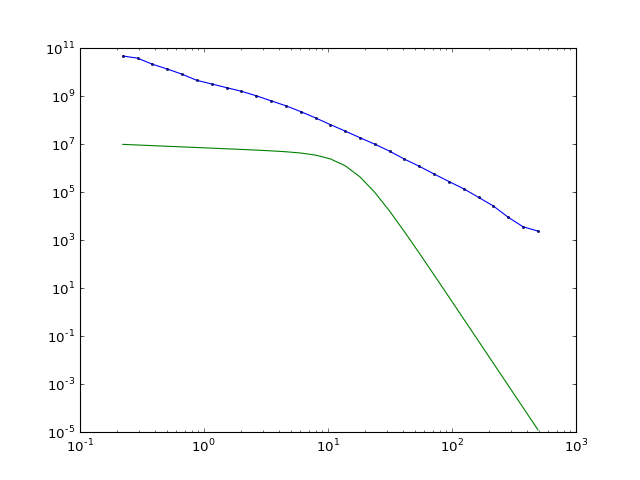

In [11]:
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(mymodel.r,mymodel.profileDMO,'o-',ms=2)
ax.plot(mymodel.r,abg_profile(np.array(mymodel.r),po,r_s,al,be,ga))